<a href="https://colab.research.google.com/github/SauravGupta95/CNN-Implementation-for-MNIST-Digit-Recognition/blob/main/CNNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing numpy, pandas, sklearn, matplotlib, tensorflow

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Load the MNIST dataset

In [2]:

def load_mnist_from_csv():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(url, header=None)
    # Extract features (pixel values) and labels from the DataFrame
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

# Step 2: Preprocess the data

In [3]:

def preprocess_mnist(X, y):
    # Normalize pixel values
    X = X / 16.0  # Pixel values range from 0 to 16
    # Reshape images to 8x8 (as the original dataset contains flattened 8x8 images)
    X = X.reshape(-1, 8, 8, 1)
    return X, y

# Load the dataset

In [4]:

X, y = load_mnist_from_csv()

# Preprocess the data

In [5]:

X, y = preprocess_mnist(X, y)

# K-Fold Cross Validation

In [6]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation results

In [7]:

accuracy_scores = []
conf_matrices = []

# Iterate over K-Fold splits

In [8]:

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


# Define the CNN architecture

In [9]:

model = Sequential([
    # Convolutional Layer 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    # Max Pooling Layer 1
    MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    # Max Pooling Layer 2
    MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 3
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    # Flatten layer
    Flatten(),
    # Fully connected layer
    Dense(units=128, activation='relu'),
    # Output layer
    Dense(units=10, activation='softmax')
])

# Compile the model

In [10]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model

In [11]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
96/96 [==============================] - 4s 19ms/step - loss: 1.1805 - accuracy: 0.6201 - val_loss: 0.2283 - val_accuracy: 0.9411
Epoch 2/10
96/96 [==============================] - 1s 12ms/step - loss: 0.1787 - accuracy: 0.9503 - val_loss: 0.0981 - val_accuracy: 0.9751
Epoch 3/10
96/96 [==============================] - 1s 11ms/step - loss: 0.1202 - accuracy: 0.9673 - val_loss: 0.0780 - val_accuracy: 0.9791
Epoch 4/10
96/96 [==============================] - 1s 12ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: 0.0776 - val_accuracy: 0.9777
Epoch 5/10
96/96 [==============================] - 1s 12ms/step - loss: 0.0694 - accuracy: 0.9794 - val_loss: 0.1031 - val_accuracy: 0.9725
Epoch 6/10
96/96 [==============================] - 1s 12ms/step - loss: 0.0661 - accuracy: 0.9804 - val_loss: 0.0434 - val_accuracy: 0.9869
Epoch 7/10
96/96 [==============================] - 1s 12ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0358 - val_accuracy: 0.9895
Epoch 8/10
96

# Evaluate the model

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracy_scores.append(test_accuracy)

24/24 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9869
Test Loss: 0.037061724811792374
Test Accuracy: 0.9869109988212585


# Confusion matrix

In [13]:

y_pred = np.argmax(model.predict(X_test), axis=-1)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrices.append(conf_matrix)

24/24 [==============================] - 0s 4ms/step


# Plot training history

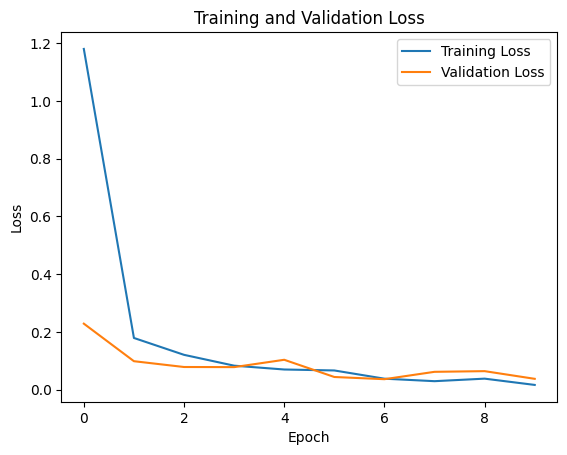

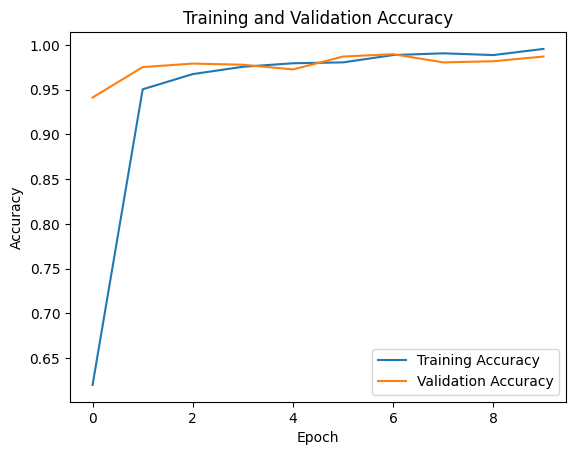

In [14]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Average accuracy across K-Fold splits

In [15]:

avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.9869109988212585


# Average confusion matrix across K-Fold splits

In [16]:

avg_conf_matrix = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix.astype(int))

Average Confusion Matrix:
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  1  0  0  0  0  0  0  0]
 [ 0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  0  0  0]
 [ 0  0  0  0 84  0  1  0  0  1]
 [ 0  0  0  0  0 71  0  0  0  0]
 [ 0  0  0  0  1  0 68  0  0  0]
 [ 0  0  0  0  0  0  0 88  0  0]
 [ 0  1  0  0  0  0  0  0 80  0]
 [ 1  1  0  1  1  0  0  0  1 84]]
